In [1]:
import inspect as ins
import sklearn as sk
import os
import glob
from os import walk

In [2]:
def basedir(filepath):
    li=filepath.split('\\')
    del li[-1]
    bdir='\\'.join(li)
    return bdir

In [3]:
def allrecfiles(dirpath,extfile=None):
    filenames = []
    for dirs , subdir , files in os.walk(dirpath):
        for name in files:
            filename = os.path.join(dirs,name)
            if extfile == None:
                filenames.append(filename)
            else:
                if filename.endswith(extfile):
                    filenames.append(filename)
    return filenames

In [4]:
def removeext(filename,extfile=None):
    li=filename.split(extfile)
    return li[0]

In [5]:
def bottompath(filename):
    li=filename.split('\\')
    if li[-1] == '':
        return li[-2]
    else:
        return li[-1]

In [6]:
def dirdepth(dirpath):
    li=dirpath.split('\\')
    if li[-1] == '':
        return len(li) - 1
    else:
        return len(li)

In [7]:
def baseroot(dirpath,dirpath1):
    dep=dirdepth(dirpath)
    arr=dirpath1.split('\\')
    new_arr=[]
    for i in range(dep,len(arr)):
        new_arr.append(arr[i])
    return new_arr

In [13]:
baseroot('F:\\Anaconda\\Lib\\site-packages\\sklearn','F:\\Anaconda\\Lib\\site-packages\\sklearn\\multioutput')

['multioutput']

In [14]:
def getselmem(obj,pred=None):
    li=[]
    for j in pred:
        li.append(ins.getmembers(obj,j))
    final_list=[]
    for i in li:
        for j in i:
            final_list.append(j)
    return final_list

In [23]:
def main(allfiles):
    di={}
    for i in allfiles:
        i=removeext(i,'.py')
        li=baseroot('F:\\Anaconda\\Lib\\site-packages',i)
        importstr=('.').join(li)
        str1= 'import ' + importstr 
        str2='di[\'' + importstr + '\']=getselmem(' + importstr +  ',[ins.isfunction,ins.ismethod,ins.isclass])'
        try:
            exec(str1)
            exec(str2)
        except:
            pass
    return di

In [24]:
allfiles=allrecfiles('F:\\Anaconda\\Lib\\site-packages\\sklearn\\','.py')
# allrecfiles('F:\\Anaconda\\Lib\\site-packages\\sklearn\\','.py')

In [26]:
t=main(allfiles)
# print(t)

In [28]:
import networkx as nx
# from graphviz import Digraph
G = nx.DiGraph()
# G = Digraph()
for i in t.keys():
    #node_num = 0
    G.add_node(i)
    j=t[i]
    for k in j:
        G.add_node(ins.getmodule(k[1]).__name__ + '.' + k[0])
        if i == ins.getmodule(k[1]).__name__ :
            G.add_edge(i,ins.getmodule(k[1]).__name__ + '.' + k[0])
        else:
            G.add_edge(ins.getmodule(k[1]).__name__ + '.' + k[0],i)
    #G = nx.relabel.convert_node_labels_to_integers(G)

In [29]:
def sub_graph(node,G):
    li=[]
    for j in G.predecessors(node):
        li.append(j)
    for j in G.successors(node):
        li.append(j)
    li.append(node)
    return G.subgraph(li)

In [30]:
Gsub=sub_graph('sklearn.cross_decomposition.pls_',G)

In [31]:
H = nx.DiGraph()
H = Gsub.copy()   

In [35]:
for n in Gsub:
    arr = n.split('.')
    for i in range(len(arr)-1):
        H.add_node(arr[i])
    for i in range(len(arr)-1):
        if i != len(arr) - 2:
            H.add_edge(arr[i],arr[i+1])
        else:
            H.add_edge(arr[i],n)

In [37]:
for n in H:
    H.nodes[n]['name'] = n.split('.')[-1]

In [38]:
# type(nx.node_link_data(sub_graph('sklearn.cross_decomposition.pls_',G)))
import json
# json.dump(nx.node_link_data(sub_graph('sklearn.cross_decomposition.pls_',G)))
# Gsub=sub_graph('sklearn.cross_decomposition.pls_',G)
# for n in Gsub:
#     Gsub.nodes[n]['name'] = n
from networkx.readwrite import json_graph

In [39]:
from networkx import convert_node_labels_to_integers
# Gsub=sub_graph('sklearn.cross_decomposition.pls_',G)
Glab=convert_node_labels_to_integers(H)

In [40]:
from networkx.readwrite import json_graph
d = json_graph.node_link_data(Glab)

In [41]:
d

{'directed': True,
 'graph': {},
 'links': [{'source': 0, 'target': 30},
  {'source': 1, 'target': 11},
  {'source': 2, 'target': 2},
  {'source': 2, 'target': 28},
  {'source': 3, 'target': 17},
  {'source': 3, 'target': 15},
  {'source': 4, 'target': 11},
  {'source': 5, 'target': 11},
  {'source': 6, 'target': 11},
  {'source': 7, 'target': 11},
  {'source': 7, 'target': 21},
  {'source': 8, 'target': 11},
  {'source': 11, 'target': 33},
  {'source': 11, 'target': 26},
  {'source': 11, 'target': 19},
  {'source': 11, 'target': 23},
  {'source': 11, 'target': 9},
  {'source': 11, 'target': 10},
  {'source': 11, 'target': 29},
  {'source': 12, 'target': 1},
  {'source': 13, 'target': 11},
  {'source': 14, 'target': 11},
  {'source': 15, 'target': 17},
  {'source': 16, 'target': 11},
  {'source': 17, 'target': 0},
  {'source': 17, 'target': 20},
  {'source': 17, 'target': 12},
  {'source': 18, 'target': 11},
  {'source': 20, 'target': 2},
  {'source': 21, 'target': 33},
  {'source': 21

In [42]:
json.dump(d, open('force.json', 'w'))
# from google.colab import files
# files.download('force.json')

{'abc.abstractmethod': array([-212.25208904,  458.96265528]), 'scipy.linalg.decomp_svd.svd': array([466.95672358, 274.109432  ]), 'scipy.sparse.linalg.eigen.arpack.arpack.svds': array([ 467.0216879, -237.7297409]), 'sklearn.cross_decomposition.pls_': array([19.64980664, 20.75182116]), 'sklearn.cross_decomposition.pls_._PLS': array([3264.05694774, 1085.99744188]), 'sklearn.utils.validation.check_is_fitted': array([  15.96980282, -490.0796632 ]), 'sklearn.base.RegressorMixin': array([-236.21740939, -417.33666012]), 'sklearn.utils.validation.check_array': array([515.70257748,  19.85143759]), 'sklearn.cross_decomposition.pls_._svd_cross_product': array([-2534.56160369,    42.28329314]), 'sklearn.base.BaseEstimator': array([-415.40724013, -221.4165141 ]), 'sklearn.cross_decomposition.pls_.PLSRegression': array([-2904.27655653, -1499.36283039]), 'sklearn.cross_decomposition.pls_.PLSSVD': array([ 1399.61973291, -2992.91529481]), 'sklearn.base.TransformerMixin': array([-418.91639049,  298.3179

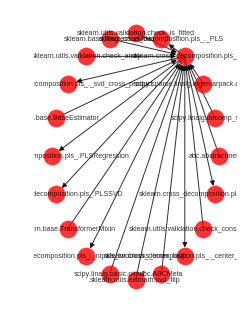

In [22]:
# list(G.predecessors('sklearn.cross_decomposition.pls_'))
s = sub_graph('sklearn.cross_decomposition.pls_',G)
pos = nx.drawing.spring_layout(s, scale=3300)
print(pos)
# print(G.nodes())
# plt.subplot(111)
# nx.draw(s,pos, with_labels=True,node_size = 15, node_color='#A0CBE2')
plt.subplot(122)
nx.draw_shell(s,with_labels=True, alpha=0.8, font_size=7)
plt.show()

# New Section

In [23]:
!pip install bokeh

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()
from bokeh.models.graphs import from_networkx
from bokeh.models import Range1d, Plot
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine

plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

# graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
graph = from_networkx(sub_graph('sklearn.cross_decomposition.pls_',G), nx.spring_layout, scale=3, center=(0,0))
plot.renderers.append(graph)


# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

Loading BokehJS ...